In [208]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.svm import SVC

In [209]:
def plot_svc(svc, X, y):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max,100))
    out = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    out = out .reshape(xx.shape)
    plt.contour(xx, yy, out )

    plot(X, y)
    
    plt.show()

In [210]:
def plot(X,Y):
    print(X.shape,Y.shape)
    Xpos=X[Y[:,0]==1]
    Xneg=X[Y[:,0]==0]
    
    plt.scatter(Xpos[:,0],Xpos[:,1],marker='+')
    plt.scatter(Xneg[:,0],Xneg[:,1],marker='o',c='y')

In [211]:
def load_data(f,val=0):
    data=sio.loadmat(f)
    X,Y=data['X'],data['y']
    plot(X,Y)
    if val==0:
        return X,Y
    else:
        return X,Y,data['Xval'],data['yval']

(51, 2) (51, 1)


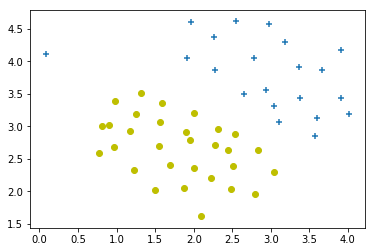

In [212]:
X,Y=load_data('../machine-learning-ex6/ex6/ex6data1.mat')

(51, 2) (51, 1)


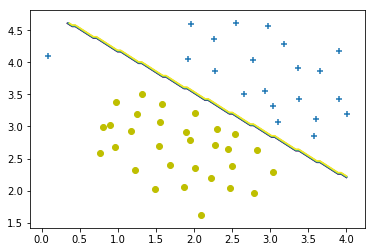

In [213]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y.ravel())
plot_svc(clf, X, Y)

(51, 2) (51, 1)


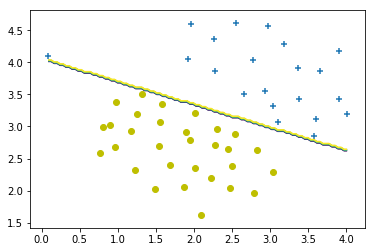

In [214]:
clf = SVC(C=100.0, kernel='linear')
clf.fit(X, Y.ravel())
plot_svc(clf, X, Y)

# Gausian Kernal

### gamma = 1/(sigma)^2

In [215]:
def gausian_kernal(x1,x2,gamma=1,sigma=999):
    if sigma == 999:
        sigma = np.power(gamma,-0.5)
    return np.exp(-np.sum((x1-x2)**2)/(2.0 * (sigma**2)))


## if gamma is given we find sigma from gamma asssuming sigma is not given so sigma takes 999

In [216]:
x1 = [1,2,1]
x2 = [0,4,-1]
sigma = 2

print('gausian_kernal value : ',gausian_kernal(np.asarray(x1),np.asarray(x2),sigma=sigma))

gausian_kernal value :  0.32465246735834974


# Dataset 2

(863, 2) (863, 1)


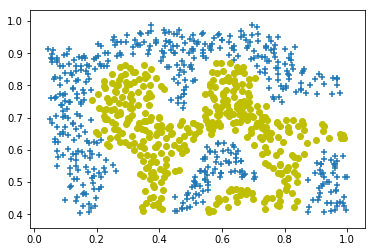

In [217]:
X,Y=load_data('../machine-learning-ex6/ex6/ex6data2.mat')

(863, 2) (863, 1)


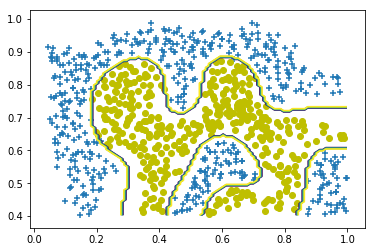

In [218]:
C = 1
sigma = 0.1
gamma = np.power(sigma,-2.0)
clf = SVC(C=C, kernel='rbf',gamma=gamma)
clf.fit(X, Y.ravel())
plot_svc(clf, X, Y)

# Dataset 3

(211, 2) (211, 1)


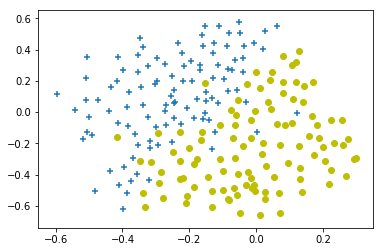

In [219]:
X,Y,Xval,Yval=load_data('../machine-learning-ex6/ex6/ex6data3.mat',val=1)

In [220]:
def get_best_svm(X,Y,Xval,Yval):
    values=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    parms=[0,0,0,0]
    val_score=0
    for C in values:
        for sigma in values:
            gamma = np.power(sigma,-2.)
            clf = SVC(C=C, kernel='rbf',gamma=gamma)
            clf.fit(X, Y.ravel())
            cval_score = clf.score(Xval,Yval)
            if cval_score > val_score:
                val_score = cval_score
                best_svm=clf
                parms[0]=best_svm
                parms[1]=val_score
                parms[2]=C
                parms[3]=sigma
    return parms

The best svm is with C =  0.3  and sigma =  0.1  with accuracy of :  96.5
(211, 2) (211, 1)


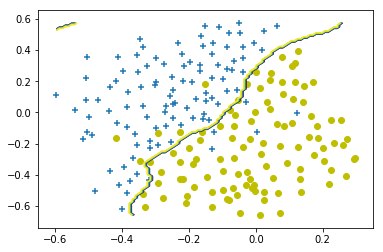

In [221]:
best_svm_params=get_best_svm(X,Y,Xval,Yval)

print('The best svm is with C = ',best_svm_params[2],' and sigma = ',best_svm_params[3],' with VAL accuracy of : ',best_svm_params[1]*100.0)
plot_svc(best_svm_params[0],X,Y)